# Module-10-Challenge - sqlalchemy-challenge

In [235]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [236]:
import warnings
warnings.filterwarnings('ignore')

In [237]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [238]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, select

In [239]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [240]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [241]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [242]:
# reflect an existing database into a new model

Base = automap_base()
Base.prepare(engine, reflect = True)
Base.classes.keys()

['measurement', 'station']

In [243]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [244]:
# View all of the classes that automap found
for mapClass in Base.classes:
    print(mapClass)

<class 'sqlalchemy.ext.automap.measurement'>
<class 'sqlalchemy.ext.automap.station'>


In [245]:
Base.classes.keys()

['measurement', 'station']

In [246]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [247]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [248]:
query = select(Station).where(Station.id > 0)
for station in session.scalars(query):
    print(f"{station.id} - {station.name}")
    
#session.execute(query).scalars().all()

1 - WAIKIKI 717.2, HI US
2 - KANEOHE 838.1, HI US
3 - KUALOA RANCH HEADQUARTERS 886.9, HI US
4 - PEARL CITY, HI US
5 - UPPER WAHIAWA 874.3, HI US
6 - WAIMANALO EXPERIMENTAL FARM, HI US
7 - WAIHEE 837.5, HI US
8 - HONOLULU OBSERVATORY 702.2, HI US
9 - MANOA LYON ARBO 785.2, HI US


In [249]:
results = session.query(Station.name)
for results in results:
    print(results)

('WAIKIKI 717.2, HI US',)
('KANEOHE 838.1, HI US',)
('KUALOA RANCH HEADQUARTERS 886.9, HI US',)
('PEARL CITY, HI US',)
('UPPER WAHIAWA 874.3, HI US',)
('WAIMANALO EXPERIMENTAL FARM, HI US',)
('WAIHEE 837.5, HI US',)
('HONOLULU OBSERVATORY 702.2, HI US',)
('MANOA LYON ARBO 785.2, HI US',)


In [250]:
from datetime import datetime
s = "2018-01-03"
f = "%Y-%m-%d"
out = datetime.strptime(s, f)
print(out)

2018-01-03 00:00:00


In [251]:
query = select(Measurement)
for m in session.scalars(query):
    print(f"{m.id}, {m.station}, {m.date}, {m.prcp}")

1, USC00519397, 2010-01-01, 0.08
2, USC00519397, 2010-01-02, 0.0
3, USC00519397, 2010-01-03, 0.0
4, USC00519397, 2010-01-04, 0.0
5, USC00519397, 2010-01-06, None
6, USC00519397, 2010-01-07, 0.06
7, USC00519397, 2010-01-08, 0.0
8, USC00519397, 2010-01-09, 0.0
9, USC00519397, 2010-01-10, 0.0
10, USC00519397, 2010-01-11, 0.01
11, USC00519397, 2010-01-12, 0.0
12, USC00519397, 2010-01-14, 0.0
13, USC00519397, 2010-01-15, 0.0
14, USC00519397, 2010-01-16, 0.0
15, USC00519397, 2010-01-17, 0.0
16, USC00519397, 2010-01-18, 0.0
17, USC00519397, 2010-01-19, 0.0
18, USC00519397, 2010-01-20, 0.0
19, USC00519397, 2010-01-21, 0.0
20, USC00519397, 2010-01-22, 0.0
21, USC00519397, 2010-01-23, 0.0
22, USC00519397, 2010-01-24, 0.01
23, USC00519397, 2010-01-25, 0.0
24, USC00519397, 2010-01-26, 0.04
25, USC00519397, 2010-01-27, 0.12
26, USC00519397, 2010-01-28, 0.0
27, USC00519397, 2010-01-30, None
28, USC00519397, 2010-01-31, 0.03
29, USC00519397, 2010-02-01, 0.01
30, USC00519397, 2010-02-03, None
31, USC0

1914, USC00519397, 2015-05-31, 0.0
1915, USC00519397, 2015-06-01, 0.0
1916, USC00519397, 2015-06-02, 0.0
1917, USC00519397, 2015-06-03, 0.0
1918, USC00519397, 2015-06-04, 0.0
1919, USC00519397, 2015-06-05, 0.0
1920, USC00519397, 2015-06-06, 0.0
1921, USC00519397, 2015-06-07, 0.0
1922, USC00519397, 2015-06-08, 0.0
1923, USC00519397, 2015-06-09, 0.0
1924, USC00519397, 2015-06-10, 0.0
1925, USC00519397, 2015-06-11, 0.0
1926, USC00519397, 2015-06-12, 0.0
1927, USC00519397, 2015-06-13, 0.0
1928, USC00519397, 2015-06-14, 0.0
1929, USC00519397, 2015-06-15, 0.0
1930, USC00519397, 2015-06-16, 0.0
1931, USC00519397, 2015-06-17, 0.03
1932, USC00519397, 2015-06-18, 0.0
1933, USC00519397, 2015-06-19, 0.01
1934, USC00519397, 2015-06-20, 0.04
1935, USC00519397, 2015-06-21, 0.0
1936, USC00519397, 2015-06-22, 0.0
1937, USC00519397, 2015-06-23, 0.03
1938, USC00519397, 2015-06-24, 0.03
1939, USC00519397, 2015-06-25, 0.03
1940, USC00519397, 2015-06-26, 0.0
1941, USC00519397, 2015-06-27, 0.0
1942, USC00519

3816, USC00513117, 2013-01-19, 0.0
3817, USC00513117, 2013-01-20, 0.0
3818, USC00513117, 2013-01-21, 0.0
3819, USC00513117, 2013-01-22, 0.0
3820, USC00513117, 2013-01-23, 0.0
3821, USC00513117, 2013-01-24, 0.71
3822, USC00513117, 2013-01-25, 0.59
3823, USC00513117, 2013-01-26, 0.0
3824, USC00513117, 2013-01-27, 0.03
3825, USC00513117, 2013-01-28, 2.6
3826, USC00513117, 2013-01-29, 0.71
3827, USC00513117, 2013-01-30, 0.0
3828, USC00513117, 2013-01-31, 0.0
3829, USC00513117, 2013-02-01, 0.0
3830, USC00513117, 2013-02-02, 0.0
3831, USC00513117, 2013-02-03, 0.0
3832, USC00513117, 2013-02-04, 0.0
3833, USC00513117, 2013-02-05, 0.0
3834, USC00513117, 2013-02-06, 0.0
3835, USC00513117, 2013-02-07, 0.16
3836, USC00513117, 2013-02-08, 0.01
3837, USC00513117, 2013-02-09, 0.0
3838, USC00513117, 2013-02-10, 0.02
3839, USC00513117, 2013-02-11, 0.07
3840, USC00513117, 2013-02-12, 0.02
3841, USC00513117, 2013-02-13, 0.02
3842, USC00513117, 2013-02-14, 0.0
3843, USC00513117, 2013-02-15, 0.0
3844, USC0

5725, USC00514830, 2011-01-04, 0.0
5726, USC00514830, 2011-01-05, 0.0
5727, USC00514830, 2011-01-06, 0.13
5728, USC00514830, 2011-01-07, 0.0
5729, USC00514830, 2011-01-08, 0.0
5730, USC00514830, 2011-01-09, 0.08
5731, USC00514830, 2011-01-10, 0.0
5732, USC00514830, 2011-01-11, 0.61
5733, USC00514830, 2011-01-12, 0.54
5734, USC00514830, 2011-01-13, 3.91
5735, USC00514830, 2011-01-14, 0.17
5736, USC00514830, 2011-01-16, 0.0
5737, USC00514830, 2011-01-17, 0.07
5738, USC00514830, 2011-01-18, 0.0
5739, USC00514830, 2011-01-19, 0.07
5740, USC00514830, 2011-01-20, 0.03
5741, USC00514830, 2011-01-21, 0.1
5742, USC00514830, 2011-01-22, 0.0
5743, USC00514830, 2011-01-23, 0.0
5744, USC00514830, 2011-01-24, 0.0
5745, USC00514830, 2011-01-25, 0.0
5746, USC00514830, 2011-01-26, 0.0
5747, USC00514830, 2011-01-27, 0.0
5748, USC00514830, 2011-01-28, 0.0
5749, USC00514830, 2011-01-31, None
5750, USC00514830, 2011-02-01, 0.0
5751, USC00514830, 2011-02-02, 0.0
5752, USC00514830, 2011-02-03, 0.0
5753, USC0

7640, USC00517948, 2010-05-07, 0.08
7641, USC00517948, 2010-05-10, 0.0
7642, USC00517948, 2010-05-11, 0.0
7643, USC00517948, 2010-05-12, 0.0
7644, USC00517948, 2010-05-13, None
7645, USC00517948, 2010-05-14, 0.0
7646, USC00517948, 2010-05-17, None
7647, USC00517948, 2010-05-18, 0.0
7648, USC00517948, 2010-05-19, 0.0
7649, USC00517948, 2010-05-20, 0.02
7650, USC00517948, 2010-05-21, 0.03
7651, USC00517948, 2010-05-25, 0.0
7652, USC00517948, 2010-05-26, 0.0
7653, USC00517948, 2010-05-27, 0.0
7654, USC00517948, 2010-05-28, 0.0
7655, USC00517948, 2010-06-01, 0.0
7656, USC00517948, 2010-06-02, 0.0
7657, USC00517948, 2010-06-03, 0.14
7658, USC00517948, 2010-06-04, 0.0
7659, USC00517948, 2010-06-07, 0.0
7660, USC00517948, 2010-06-08, 0.0
7661, USC00517948, 2010-06-09, 0.0
7662, USC00517948, 2010-06-10, 0.0
7663, USC00517948, 2010-06-15, 0.0
7664, USC00517948, 2010-06-16, 0.0
7665, USC00517948, 2010-06-17, 0.0
7666, USC00517948, 2010-06-18, 0.05
7667, USC00517948, 2010-06-21, 0.0
7668, USC0051

9864, USC00519523, 2010-12-15, 0.0
9865, USC00519523, 2010-12-16, 0.0
9866, USC00519523, 2010-12-17, 0.0
9867, USC00519523, 2010-12-18, 0.0
9868, USC00519523, 2010-12-19, 2.86
9869, USC00519523, 2010-12-20, 4.95
9870, USC00519523, 2010-12-21, 0.63
9871, USC00519523, 2010-12-22, 0.58
9872, USC00519523, 2010-12-23, 0.11
9873, USC00519523, 2010-12-24, 0.02
9874, USC00519523, 2010-12-25, 0.02
9875, USC00519523, 2010-12-26, 0.74
9876, USC00519523, 2010-12-27, 0.09
9877, USC00519523, 2010-12-28, 0.07
9878, USC00519523, 2010-12-29, 0.04
9879, USC00519523, 2010-12-30, 0.27
9880, USC00519523, 2010-12-31, 0.01
9881, USC00519523, 2011-01-01, 0.03
9882, USC00519523, 2011-01-02, 0.0
9883, USC00519523, 2011-01-03, 0.0
9884, USC00519523, 2011-01-04, 0.0
9885, USC00519523, 2011-01-05, 0.0
9886, USC00519523, 2011-01-06, 0.15
9887, USC00519523, 2011-01-07, 0.02
9888, USC00519523, 2011-01-08, 0.0
9889, USC00519523, 2011-01-09, 0.0
9890, USC00519523, 2011-01-10, 0.0
9891, USC00519523, 2011-01-11, 0.43
989

11696, USC00519523, 2016-03-11, 0.0
11697, USC00519523, 2016-03-12, 0.0
11698, USC00519523, 2016-03-14, None
11699, USC00519523, 2016-03-16, None
11700, USC00519523, 2016-03-17, 0.0
11701, USC00519523, 2016-03-18, 0.0
11702, USC00519523, 2016-03-21, None
11703, USC00519523, 2016-03-22, 0.0
11704, USC00519523, 2016-03-23, 1.05
11705, USC00519523, 2016-03-24, 0.0
11706, USC00519523, 2016-03-25, 0.03
11707, USC00519523, 2016-03-26, 0.03
11708, USC00519523, 2016-03-27, 0.0
11709, USC00519523, 2016-03-28, 0.0
11710, USC00519523, 2016-03-29, 0.04
11711, USC00519523, 2016-03-30, 0.0
11712, USC00519523, 2016-03-31, 0.01
11713, USC00519523, 2016-04-01, 0.0
11714, USC00519523, 2016-04-02, 0.0
11715, USC00519523, 2016-04-03, 0.0
11716, USC00519523, 2016-04-04, 0.0
11717, USC00519523, 2016-04-06, None
11718, USC00519523, 2016-04-07, 0.0
11719, USC00519523, 2016-04-08, 0.0
11720, USC00519523, 2016-04-09, 0.0
11721, USC00519523, 2016-04-10, 0.0
11722, USC00519523, 2016-04-11, 0.0
11723, USC00519523,

13581, USC00519281, 2013-10-30, 0.0
13582, USC00519281, 2013-10-31, 0.23
13583, USC00519281, 2013-11-01, 0.02
13584, USC00519281, 2013-11-02, 0.27
13585, USC00519281, 2013-11-03, 0.0
13586, USC00519281, 2013-11-04, 0.12
13587, USC00519281, 2013-11-05, 0.24
13588, USC00519281, 2013-11-06, 0.8
13589, USC00519281, 2013-11-07, 0.12
13590, USC00519281, 2013-11-08, 1.42
13591, USC00519281, 2013-11-09, 2.21
13592, USC00519281, 2013-11-10, 5.54
13593, USC00519281, 2013-11-11, 0.3
13594, USC00519281, 2013-11-12, 0.23
13595, USC00519281, 2013-11-13, 0.02
13596, USC00519281, 2013-11-14, 0.02
13597, USC00519281, 2013-11-15, 0.47
13598, USC00519281, 2013-11-16, 0.03
13599, USC00519281, 2013-11-17, 0.01
13600, USC00519281, 2013-11-18, 0.04
13601, USC00519281, 2013-11-19, 0.01
13602, USC00519281, 2013-11-20, 0.0
13603, USC00519281, 2013-11-21, 0.0
13604, USC00519281, 2013-11-22, 0.01
13605, USC00519281, 2013-11-23, 0.11
13606, USC00519281, 2013-11-24, 0.0
13607, USC00519281, 2013-11-25, 0.0
13608, US

15692, USC00511918, 2012-01-22, 0.0
15693, USC00511918, 2012-01-23, 0.01
15694, USC00511918, 2012-01-24, 0.0
15695, USC00511918, 2012-01-25, 0.0
15696, USC00511918, 2012-01-26, 0.0
15697, USC00511918, 2012-01-27, 0.33
15698, USC00511918, 2012-01-28, 0.0
15699, USC00511918, 2012-01-29, 0.01
15700, USC00511918, 2012-01-30, 0.01
15701, USC00511918, 2012-01-31, 0.0
15702, USC00511918, 2012-02-01, 0.0
15703, USC00511918, 2012-02-02, 0.0
15704, USC00511918, 2012-02-03, 0.0
15705, USC00511918, 2012-02-04, 0.0
15706, USC00511918, 2012-02-05, 0.0
15707, USC00511918, 2012-02-06, 0.15
15708, USC00511918, 2012-02-07, 0.3
15709, USC00511918, 2012-02-08, 0.39
15710, USC00511918, 2012-02-09, 0.0
15711, USC00511918, 2012-02-10, 0.0
15712, USC00511918, 2012-02-11, 0.0
15713, USC00511918, 2012-02-12, 0.0
15714, USC00511918, 2012-02-13, 0.0
15715, USC00511918, 2012-02-14, 0.0
15716, USC00511918, 2012-02-15, 0.0
15717, USC00511918, 2012-02-16, 0.0
15718, USC00511918, 2012-02-17, 0.0
15719, USC00511918, 20

17765, USC00516128, 2012-05-13, 0.0
17766, USC00516128, 2012-05-14, 0.0
17767, USC00516128, 2012-05-15, 0.0
17768, USC00516128, 2012-05-16, 0.03
17769, USC00516128, 2012-05-17, 0.02
17770, USC00516128, 2012-05-18, 0.05
17771, USC00516128, 2012-05-19, 0.0
17772, USC00516128, 2012-05-20, 0.02
17773, USC00516128, 2012-05-21, 0.2
17774, USC00516128, 2012-05-22, 0.0
17775, USC00516128, 2012-05-23, 0.0
17776, USC00516128, 2012-05-24, 0.07
17777, USC00516128, 2012-05-25, 0.13
17778, USC00516128, 2012-05-26, 0.37
17779, USC00516128, 2012-05-27, 0.67
17780, USC00516128, 2012-05-28, 0.13
17781, USC00516128, 2012-05-29, 0.03
17782, USC00516128, 2012-05-30, 0.01
17783, USC00516128, 2012-05-31, 0.62
17784, USC00516128, 2012-06-01, 0.26
17785, USC00516128, 2012-06-02, 0.22
17786, USC00516128, 2012-06-03, 0.0
17787, USC00516128, 2012-06-04, 0.02
17788, USC00516128, 2012-06-05, 0.0
17789, USC00516128, 2012-06-06, 0.72
17790, USC00516128, 2012-06-07, 0.12
17791, USC00516128, 2012-06-08, 0.3
17792, USC0

# Exploratory Precipitation Analysis

## 1. Find the most recent date in the data set.

In [252]:
#repeating so I have it to view

inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [253]:
recent_Date = session.query(Measurement).order_by(Measurement.date.desc()).first()
print(recent_Date.date)

2017-08-23


## 2. Using that date, get the previous 12 months of precipitation data by querying the previous 12 months of data.

In [254]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database. 

In [255]:
year_ago = dt.date(2017,8,23) - dt.timedelta(days = 365)
print(year_ago)

2016-08-23


## 3.Select only the "date" and "prcp" values.

In [256]:
# Perform a query to retrieve the data and precipitation scores

In [257]:
PrcpData12m = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= year_ago).all()
for i in PrcpData12m:
    print (i)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

('2017-02-15', 0.07)
('2017-02-16', 0.13)
('2017-02-18', None)
('2017-02-19', 0.1)
('2017-02-20', 0.0)
('2017-02-21', 0.07)
('2017-02-22', 0.32)
('2017-02-23', 0.0)
('2017-02-24', 0.0)
('2017-02-25', 0.12)
('2017-02-26', 0.0)
('2017-02-27', 0.0)
('2017-02-28', 0.58)
('2017-03-01', 2.0)
('2017-03-02', 0.58)
('2017-03-03', 0.56)
('2017-03-04', 0.0)
('2017-03-05', 0.35)
('2017-03-06', 0.0)
('2017-03-07', 0.0)
('2017-03-08', 0.0)
('2017-03-09', 0.01)
('2017-03-10', 0.0)
('2017-03-11', 0.0)
('2017-03-13', None)
('2017-03-14', 0.0)
('2017-03-15', 0.0)
('2017-03-16', 0.0)
('2017-03-18', None)
('2017-03-19', 0.0)
('2017-03-20', 0.0)
('2017-03-21', 0.0)
('2017-03-22', 0.0)
('2017-03-23', 0.03)
('2017-03-24', 0.17)
('2017-03-25', 0.48)
('2017-03-26', 0.0)
('2017-03-27', 0.0)
('2017-03-28', 0.68)
('2017-03-29', 0.07)
('2017-03-31', None)
('2017-04-01', 0.2)
('2017-04-02', 0.0)
('2017-04-03', 0.23)
('2017-04-04', 0.02)
('2017-04-05', 0.45)
('2017-04-06', 0.0)
('2017-04-08', None)
('2017-04-09', 0.

## 4. Load the query results into a Pandas DataFrame, and set the index to the "date" column.

In [258]:
# Save the query results as a Pandas DataFrame and set the index to the date column

In [259]:
PrcpData12mDF = pd.DataFrame(PrcpData12m, columns=['date', 'precipitation'])

PrcpData12mDF.head()

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


## 5. Sort the DataFrame values by "date".

In [260]:
# Sort the dataframe by date

In [261]:
PrcpData12mDF.sort_values("date")

PrcpData12mDF.head()

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


## 6. Plot the results by using the DataFrame plot method, as the following image shows:

In [262]:
# Use Pandas Plotting with Matplotlib to plot the data

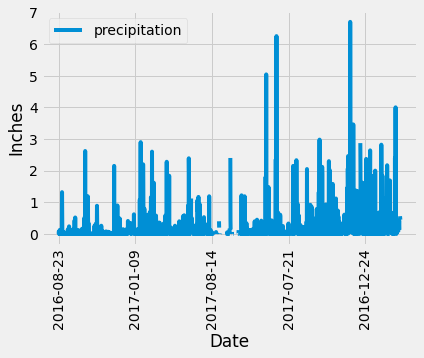

In [263]:
PrcpData12mDF.plot(x= "date", y= "precipitation", rot= 90)
plt.ylabel("Inches")
plt.xlabel("Date")
plt.show()

## 7. Use Pandas to print the summary statistics for the precipitation data.

In [264]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [267]:
PrcpData12mDF.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [268]:
# Design a query to calculate the total number stations in the dataset

In [269]:
session.query(func.count(Station.station)).all()

[(9,)]

In [270]:
totalStationsNumber = session.query(Station).group_by(Station.station).count()
print(totalStationsNumber)

9


In [271]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [272]:
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).\
    all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [273]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

In [274]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station =='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [275]:
# Using the most active station id = USC00519281
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [276]:
from pandas.plotting import table

In [277]:
#recycle year_ago 
year_ago = dt.date(2017,8,23) - dt.timedelta(days = 365)

#
MostActiveStation = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= year_ago).all()


#MostActiveStation

In [278]:
MostActiveStationDF = pd.DataFrame(MostActiveStation, columns=['tobs'])
MostActiveStationDF.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


Text(0.5, -1.340000000000014, 'Temperature Oberved')

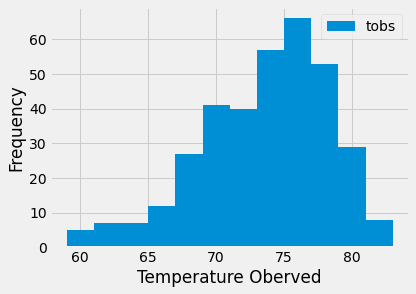

In [279]:
MostActiveStationDF.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel('Temperature Oberved')

# Close session

In [280]:
# Close Session
session.close()

# Thanks~